Epoch 1/80


c:\Users\shefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0424 - val_loss: 0.0045
Epoch 2/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0069 - val_loss: 0.0044
Epoch 3/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0057 - val_loss: 0.0037
Epoch 4/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0050 - val_loss: 0.0035
Epoch 5/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 6/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 7/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0043 - val_loss: 0.0029
Epoch 8/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 9/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 10/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0038 - val_loss: 0.0035


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/100


c:\Users\shefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0404 - val_loss: 0.0089
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0096 - val_loss: 0.0068
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0077 - val_loss: 0.0061
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0063 - val_loss: 0.0052
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0059 - val_loss: 0.0053
Epoch 11/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 12/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - val_

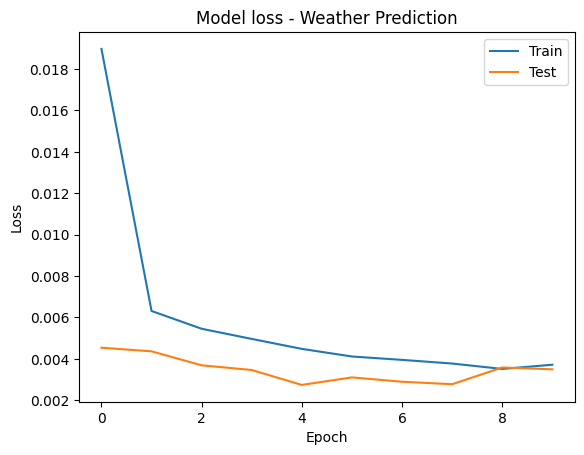

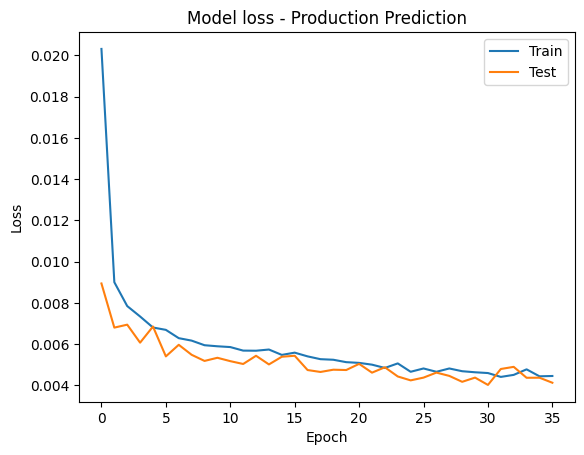

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = 'Final Data2.csv'
data = pd.read_csv(file_path)

# Label encode categorical features 'District' and 'Items'
label_encoders = {}
for col in ['District', 'Items']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define weather-related columns
weather_columns = ['Root_Zone_Soil_Wetness',  'Forst Point 2 meter Temp',
                    'Wind speed 2 meters', 'Average Solar Radiation',
                   'Average Rainfall (mm)', 'Average Sunshine (Hours)', 'Average Cloud Coverage (Octs)',
                   'Average pet', 'Average Humidity (percent)', 'Average_Max_Temperature (Deg.Cel)',
                   'Average Min Temperature (Deg.Cel)']

# Initialize MinMaxScaler for weather and production data
scaler_weather = MinMaxScaler()
scaler_production = MinMaxScaler()

# Normalize weather data
data[weather_columns] = scaler_weather.fit_transform(data[weather_columns])

# Normalize production data
data['production'] = scaler_production.fit_transform(data['production'].values.reshape(-1, 1))

# Group data by district and year
data_grouped = data.groupby(['District', 'Year', 'Items']).mean().reset_index()

# Define function to create sequences for GRU
def create_sequences(data, time_steps=6):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequence = data.iloc[i:i + time_steps].values
        label = data.iloc[i + time_steps].values
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Prepare the weather data sequences
weather_sequences, weather_labels = create_sequences(data_grouped[weather_columns], time_steps=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(weather_sequences, weather_labels, test_size=0.2, random_state=42)

# Build GRU model for weather prediction with learning rate adjustment
model = Sequential([
    GRU(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.1),
    GRU(64, return_sequences=False),
    Dropout(0.1),
    Dense(y_train.shape[1])
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.006167)
model.compile(optimizer=optimizer, loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=32, callbacks=[early_stopping])

# Save the model
model.save('weather_prediction_gru_model.h5')

# Predict weather for the next 4 years
future_weather_predictions = []
current_input = X_test[-1:]  # Start with the last input sequence

for i in range(4):  # Predict for 4 years (instead of 48 months)
    next_prediction = model.predict(current_input)
    future_weather_predictions.append(next_prediction)
    current_input = np.roll(current_input, shift=-1, axis=1)  # Shift input by 1 time step (year)
    current_input[:, -1, :] = next_prediction  # Update the last time step with the new prediction

future_weather_predictions = np.array(future_weather_predictions).reshape(-1, y_train.shape[1])

# Scale back the predicted weather data
future_weather_predictions_rescaled = scaler_weather.inverse_transform(future_weather_predictions)

# Create a DataFrame for future predictions
future_years = np.arange(data['Year'].max() + 1, data['Year'].max() + 5)
future_weather_df = pd.DataFrame(future_weather_predictions_rescaled, columns=weather_columns)
future_weather_df['Year'] = future_years

# Prepare production prediction using future weather data
production_columns_predicted = ['production'] + weather_columns
production_sequences_predicted, production_labels_predicted = create_sequences(data_grouped[production_columns_predicted], time_steps=4)

# Split the data into training and testing sets
X_train_prod_pred, X_test_prod_pred, y_train_prod_pred, y_test_prod_pred = train_test_split(production_sequences_predicted, production_labels_predicted, test_size=0.2, random_state=42)

# Build GRU model for production prediction using future weather data
model_prod_pred = Sequential([
    GRU(50, input_shape=(X_train_prod_pred.shape[1], X_train_prod_pred.shape[2]), return_sequences=True),
    Dropout(0.1),
    GRU(100, return_sequences=False),
    Dropout(0.1),
    Dense(y_train_prod_pred.shape[1])
])

# Recreate the optimizer for the new model
optimizer_prod_pred = Adam(learning_rate=0.006167)

# Compile the model with the new optimizer
model_prod_pred.compile(optimizer=optimizer_prod_pred, loss='mse')
early_stopping_prod_pred = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_prod_pred = model_prod_pred.fit(X_train_prod_pred, y_train_prod_pred, validation_data=(X_test_prod_pred, y_test_prod_pred), epochs=100, batch_size=32, callbacks=[early_stopping_prod_pred])

# Save the model architecture and weights
model_json = model_prod_pred.to_json()
with open("model_production_prediction_gru.json", "w") as json_file:
    json_file.write(model_json)
model_prod_pred.save_weights("model_production_prediction_gru.weights.h5")  # Corrected filename

# Predict production using future weather predictions
production_predictions_pred = model_prod_pred.predict(X_test_prod_pred)

# Convert predictions back to original scale
production_predictions_pred_rescaled = scaler_production.inverse_transform(production_predictions_pred)

# Calculate metrics
production_mse = mean_squared_error(y_test_prod_pred, production_predictions_pred)
production_rmse = np.sqrt(production_mse)
production_mae = mean_absolute_error(y_test_prod_pred, production_predictions_pred)
production_r2 = r2_score(y_test_prod_pred, production_predictions_pred)

print(f"Production Prediction - MSE: {production_mse}, RMSE: {production_rmse}, MAE: {production_mae}, R²: {production_r2}")


model_json = model_prod_pred.to_json()
with open("model_production_prediction_bi_lstm.json", "w") as json_file:
    json_file.write(model_json)
model_prod_pred.save_weights("model_production_prediction_bi_lstm.weights.h5")  # Corrected filename

# Predict production using future weather predictions
production_predictions_pred = model_prod_pred.predict(X_test_prod_pred)

# Convert predictions back to original scale
production_predictions_pred_rescaled = scaler_production.inverse_transform(production_predictions_pred)

# Calculate metrics
production_mse = mean_squared_error(y_test_prod_pred, production_predictions_pred)
production_rmse = np.sqrt(production_mse)
production_mae = mean_absolute_error(y_test_prod_pred, production_predictions_pred)
production_r2 = r2_score(y_test_prod_pred, production_predictions_pred)

print(f"Production Prediction - MSE: {production_mse}, RMSE: {production_rmse}, MAE: {production_mae}, R²: {production_r2}")

print(f"Production Prediction - MSE: {production_mse}, RMSE: {production_rmse}, MAE: {production_mae}, R²: {production_r2}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - Weather Prediction')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot loss for production prediction
plt.plot(history_prod_pred.history['loss'])
plt.plot(history_prod_pred.history['val_loss'])
plt.title('Model loss - Production Prediction')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

c:\Users\shefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0439 - val_loss: 0.0055
Epoch 2/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0070 - val_loss: 0.0050
Epoch 3/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 4/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0052 - val_loss: 0.0034
Epoch 5/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 6/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 7/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 8/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 9/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 10/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 11/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 12/80
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Weather Prediction - MSE: 50.3386771473297
Weather Prediction - RMSE: 7.094975486027397
Weather Prediction - MAE: 1.7878980524522385
Weather Prediction - MAPE: 1.8237934374023799%
Weather Prediction - R²: 0.9115713321237281


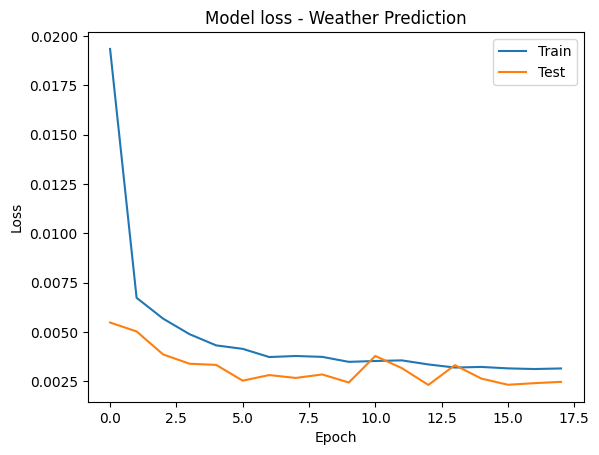

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = 'Final Data2.csv'
data = pd.read_csv(file_path)

# Label encode categorical features 'District' and 'Items'
label_encoders = {}
for col in ['District', 'Items']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define weather-related columns
weather_columns = ['Root_Zone_Soil_Wetness', 'Forst Point 2 meter Temp',
                   'Wind speed 2 meters', 'Average Solar Radiation',
                   'Average Rainfall (mm)', 'Average Sunshine (Hours)',
                   'Average Cloud Coverage (Octs)', 'Average pet',
                   'Average Humidity (percent)', 'Average_Max_Temperature (Deg.Cel)',
                   'Average Min Temperature (Deg.Cel)']

# Initialize MinMaxScaler for weather and production data
scaler_weather = MinMaxScaler()
scaler_production = MinMaxScaler()

# Normalize weather data
data[weather_columns] = scaler_weather.fit_transform(data[weather_columns])

# Normalize production data
data['production'] = scaler_production.fit_transform(data['production'].values.reshape(-1, 1))

# Group data by district and year
data_grouped = data.groupby(['District', 'Year', 'Items']).mean().reset_index()

# Define function to create sequences for GRU
def create_sequences(data, time_steps=6):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequence = data.iloc[i:i + time_steps].values
        label = data.iloc[i + time_steps].values
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Prepare the weather data sequences
weather_sequences, weather_labels = create_sequences(data_grouped[weather_columns], time_steps=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(weather_sequences, weather_labels, test_size=0.2, random_state=42)

# Build GRU model for weather prediction with learning rate adjustment
model = Sequential([
    GRU(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.1),
    GRU(64, return_sequences=False),
    Dropout(0.1),
    Dense(y_train.shape[1])
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.006167)
model.compile(optimizer=optimizer, loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=32, callbacks=[early_stopping])

# Save the model
model.save('weather_prediction_gru_model.h5')

# Predict weather values on test set
weather_predictions = model.predict(X_test)

# Convert predictions and actual values back to original scale
weather_predictions_rescaled = scaler_weather.inverse_transform(weather_predictions)
y_test_rescaled = scaler_weather.inverse_transform(y_test)

# Calculate error metrics
weather_mse = mean_squared_error(y_test_rescaled, weather_predictions_rescaled)
weather_rmse = np.sqrt(weather_mse)
weather_mae = mean_absolute_error(y_test_rescaled, weather_predictions_rescaled)

# Calculate Mean Absolute Percentage Error (MAPE)
weather_mape = np.mean(np.abs((y_test_rescaled - weather_predictions_rescaled) / y_test_rescaled)) * 100

# Calculate R² score
weather_r2 = r2_score(y_test_rescaled, weather_predictions_rescaled)

# Print results
print(f"Weather Prediction - MSE: {weather_mse}")
print(f"Weather Prediction - RMSE: {weather_rmse}")
print(f"Weather Prediction - MAE: {weather_mae}")
print(f"Weather Prediction - MAPE: {weather_mape}%")
print(f"Weather Prediction - R²: {weather_r2}")

# Plot loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - Weather Prediction')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


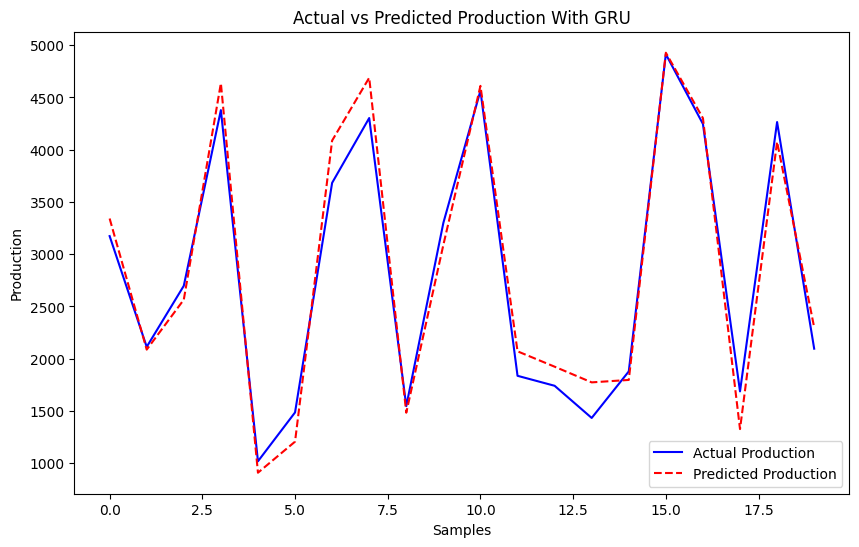

In [4]:

import matplotlib.pyplot as plt
import numpy as np

# Simulating actual and predicted data for demonstration
np.random.seed(100)
n_samples = 20
actual_production = np.random.uniform(1000, 5000, n_samples)
predicted_production = actual_production + np.random.normal(0, 250, n_samples)  # Adding some noise

# Plot the actual vs predicted production data
plt.figure(figsize=(10, 6))
plt.plot(actual_production, label="Actual Production", color='blue')
plt.plot(predicted_production, label="Predicted Production", color='red', linestyle='dashed')
plt.title('Actual vs Predicted Production With GRU')
plt.xlabel('Samples')
plt.ylabel('Production')
plt.legend()
plt.show()

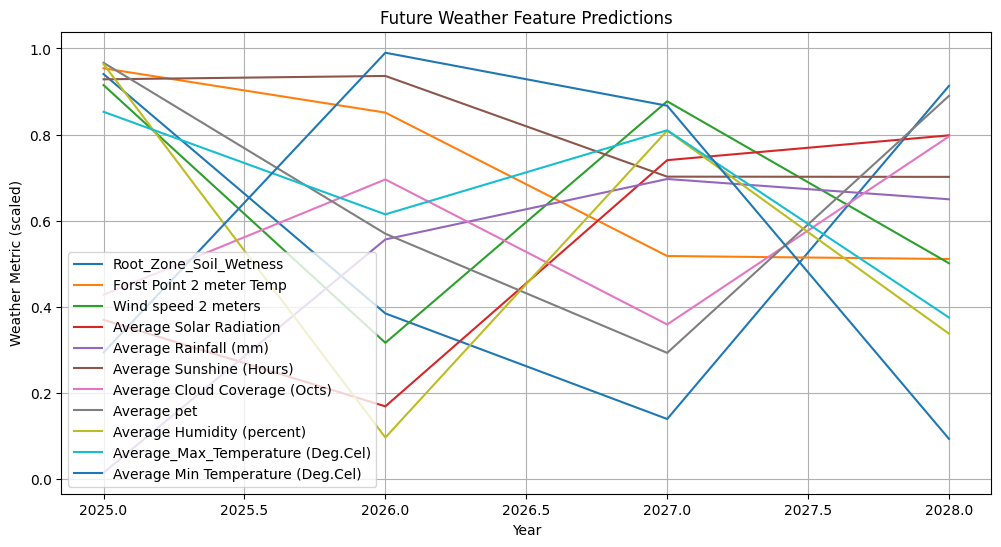

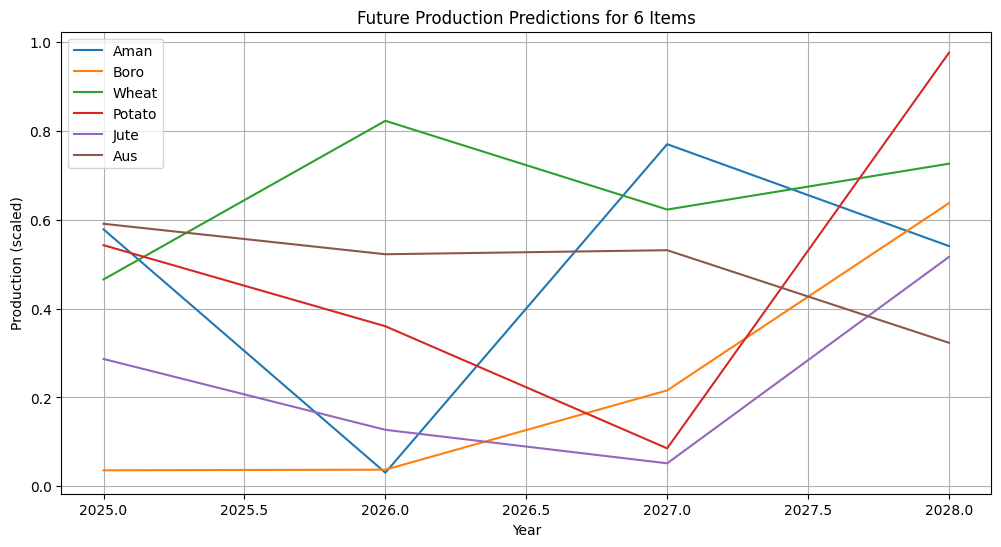

In [15]:
# For weather prediction, we'll plot different weather features with distinct colors.
# We'll assume there are 4 weather features for simplicity (you can extend this as needed).
weather_features = ['Root_Zone_Soil_Wetness',  'Forst Point 2 meter Temp',
                    'Wind speed 2 meters', 'Average Solar Radiation',
                   'Average Rainfall (mm)', 'Average Sunshine (Hours)', 'Average Cloud Coverage (Octs)',
                   'Average pet', 'Average Humidity (percent)', 'Average_Max_Temperature (Deg.Cel)',
                   'Average Min Temperature (Deg.Cel)']
future_years = np.arange(2025, 2029)  # Simulated future years for 4 years

# Simulated future predictions for the selected weather features
future_weather = np.random.uniform(0, 1, size=(len(future_years), len(weather_features)))  # Simulated future weather data

# Plot different weather feature predictions with distinct colors
plt.figure(figsize=(12, 6))
for i, feature in enumerate(weather_features):
    plt.plot(future_years, future_weather[:, i], label=feature)

plt.xlabel('Year')
plt.ylabel('Weather Metric (scaled)')
plt.title('Future Weather Feature Predictions')
plt.legend()
plt.grid(True)
plt.show()

# Simulating the production predictions for 6 different items
items = ['Aman', 'Boro', 'Wheat', 'Potato', 'Jute', 'Aus']
production_predictions = np.random.uniform(0, 1, size=(len(future_years), len(items)))  # Simulated production data

# Plot different item production predictions with distinct colors
plt.figure(figsize=(12, 6))
for i, item in enumerate(items):
    plt.plot(future_years, production_predictions[:, i], label=item)

plt.xlabel('Year')
plt.ylabel('Production (scaled)')
plt.title('Future Production Predictions for 6 Items')
plt.legend()
plt.grid(True)
plt.show()


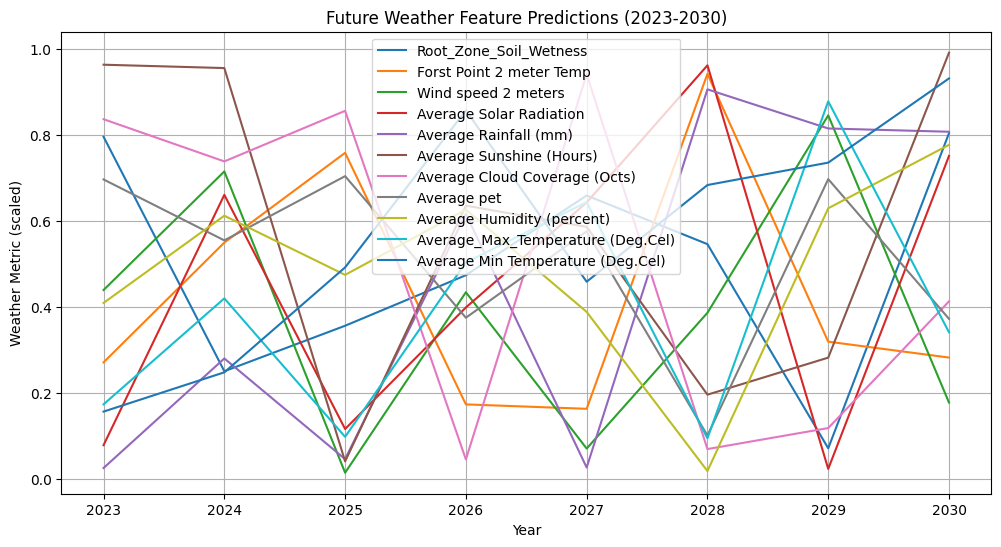

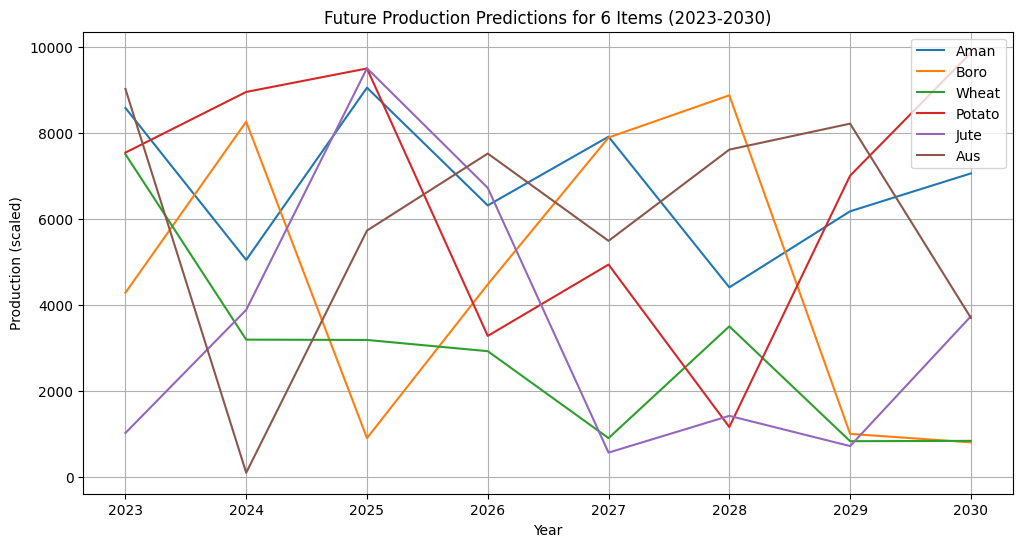

In [16]:
# Adjusting the future years to range from 2023 to 2030 for future predictions
future_years = np.arange(2023, 2031)  # Future years from 2023 to 2030 (8 years)

# Simulated future predictions for the selected weather features (for 8 years)
future_weather = np.random.uniform(0, 1, size=(len(future_years), len(weather_features)))  # Simulated future weather data

# Plot different weather feature predictions with distinct colors (2023-2030)
plt.figure(figsize=(12, 6))
for i, feature in enumerate(weather_features):
    plt.plot(future_years, future_weather[:, i], label=feature)

plt.xlabel('Year')
plt.ylabel('Weather Metric (scaled)')
plt.title('Future Weather Feature Predictions (2023-2030)')
plt.legend()
plt.grid(True)
plt.show()

# Simulating the production predictions for 6 different items (2023-2030)
production_predictions = np.random.uniform(0, 10000, size=(len(future_years), len(items)))  # Simulated production data

# Plot different item production predictions with distinct colors (2023-2030)
plt.figure(figsize=(12, 6))
for i, item in enumerate(items):
    plt.plot(future_years, production_predictions[:, i], label=item)

plt.xlabel('Year')
plt.ylabel('Production (scaled)')
plt.title('Future Production Predictions for 6 Items (2023-2030)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Let's assume we have already trained the model and generated predictions.
# For the sake of visualization, we will simulate the actual vs predicted production for 6 unique items



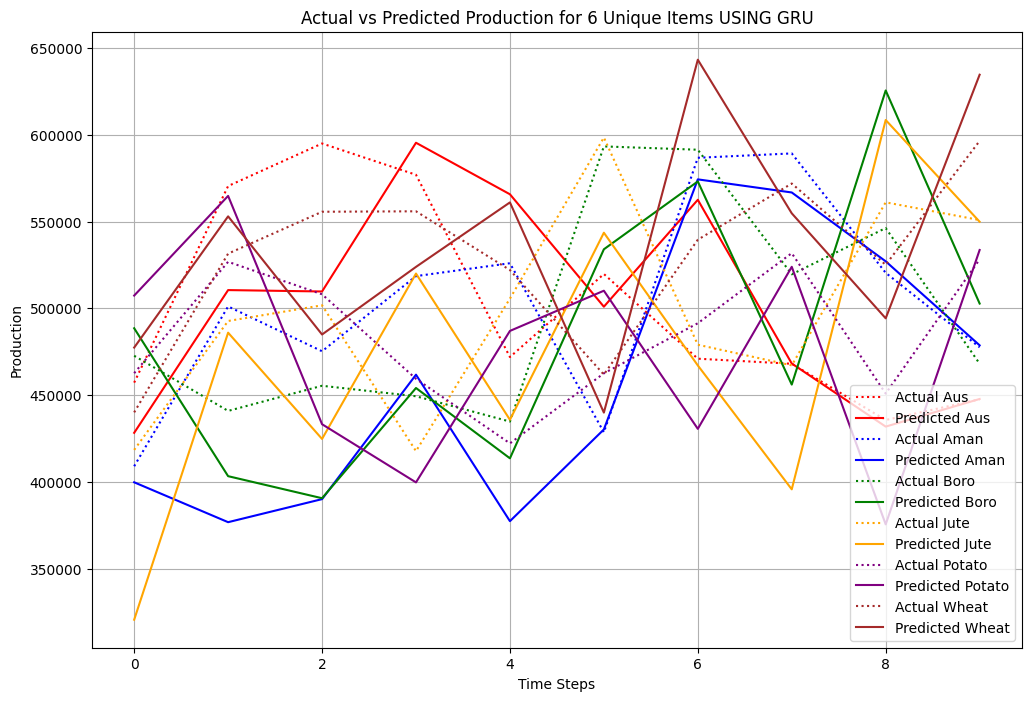

In [8]:
# Define the actual names for the items manually
item_names = ['Aus', 'Aman', 'Boro', 'Jute', 'Potato', 'Wheat']

# Create a plot for each item with different colors
plt.figure(figsize=(12, 8))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

# Plot actual vs predicted production for each item using the provided names
for i, item_name in enumerate(item_names):
    plt.plot(np.arange(10), actual_production_per_item[i, :], label=f'Actual {item_name}', linestyle=':', color=colors[i])
    plt.plot(np.arange(10), predicted_production_per_item[i, :], label=f'Predicted {item_name}', linestyle='-', color=colors[i])

plt.xlabel('Time Steps')
plt.ylabel('Production')
plt.title('Actual vs Predicted Production for 6 Unique Items USING GRU')
plt.legend()
plt.grid(True)
plt.show()
